In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ttttttttt/InSDN_DatasetCSV/metasploitable-2.csv
/kaggle/input/ttttttttt/InSDN_DatasetCSV/Normal_data.csv
/kaggle/input/ttttttttt/InSDN_DatasetCSV/OVS.csv


# Theory Explanation

This section explains the theory behind the operations performed in the code.

---

## 1. Importing the Required Library: `pandas`

- **Pandas** is a widely used library in Python for data manipulation and analysis. It provides tools for reading, writing, and processing structured data stored in tables (e.g., CSV files, Excel files, SQL databases). The core data structure in Pandas is the **DataFrame**, which organizes data in rows and columns, making it easy to access, clean, manipulate, and analyze data.

---

## 2. Loading Datasets from CSV Files

- Datasets are typically stored in CSV (Comma Separated Values) files, which are simple text files where each line represents a data record, and each record contains multiple fields separated by commas.
- The datasets used in the code are:
  1. **Metasploitable Dataset**: This dataset may represent data from a system deliberately made vulnerable (Metasploitable 2), which is often used to study and test security threats and attacks.
  2. **Normal Dataset**: This dataset likely contains normal or non-malicious data, representing regular operations or activities on a system or network.
  3. **OVS Dataset**: The Open vSwitch (OVS) dataset is used to represent network traffic data from virtualized environments using Open vSwitch, a virtual switch used to control traffic in such environments.
- By loading these CSV files into **DataFrames**, we can work with them more efficiently, performing analysis or preparing them for modeling.

---

## 3. Combining the Datasets

- Once the datasets are loaded into separate DataFrames, they are merged into one single dataset using the **`concat()`** function. This step is crucial for integrating multiple sources of data into a unified dataset.
- **Combining datasets** helps create a larger, more comprehensive dataset that can be used for more meaningful analysis or predictive modeling.
  - In this case, combining the **Metasploitable**, **Normal**, and **OVS** datasets allows for a broader analysis of network traffic, comparing normal activities with potentially malicious activities (from the Metasploitable data) and other traffic captured from virtualized environments.
  
---

## 4. Inspecting the Combined Data

- After merging the datasets, the first few rows of the combined dataset are displayed using the **`head()`** function. This step is important for inspecting the structure of the data, ensuring that the data has been loaded and combined correctly.
- Displaying the first few rows helps us understand the columns (features) of the dataset, the values within them, and whether the merging process was successful.

---

## Purpose of the Combined Dataset

- The goal of combining these datasets is to allow for a comprehensive analysis where comparisons can be made between normal network activities and potentially malicious behaviors (like those from the Metasploitable dataset).
- It also serves as a foundation for building machine learning models to classify or detect abnormal activities, analyze vulnerabilities, or detect security threats in network traffic data.

---

## Use Cases for Combining Datasets

- **Anomaly Detection**: By comparing normal and malicious traffic, models can be trained to detect abnormal behaviors or security breaches in real-time.
- **Vulnerability Testing**: The Metasploitable dataset provides data from a vulnerable system, which is often used in testing and training intrusion detection systems.
- **Network Traffic Analysis**: The combined data can be used for analyzing network traffic from various environments, like production systems, virtualized environments (OVS), or vulnerable systems.

---

## Conclusion

This approach allows for integrating data from different sources, inspecting the data for correctness, and using it as a basis for more complex analysis or machine learning tasks. By merging multiple datasets and examining them in one place, analysts can gain deeper insights into the interactions between normal operations and malicious activities, aiding in tasks like security analysis and predictive modeling.


In [32]:
import pandas as pd

# Step 1: Load Dataset
path_metasploitable = "/kaggle/input/ttttttttt/InSDN_DatasetCSV/metasploitable-2.csv"
path_normal = "/kaggle/input/ttttttttt/InSDN_DatasetCSV/Normal_data.csv"
path_ovs = "/kaggle/input/ttttttttt/InSDN_DatasetCSV/OVS.csv"

df_meta = pd.read_csv(path_metasploitable)
df_normal = pd.read_csv(path_normal)
df_ovs = pd.read_csv(path_ovs)

# Combine datasets
data = pd.concat([df_meta, df_normal, df_ovs], axis=0)
print(data.head())  # Show the first 5 rows of the combined data


                                    Flow ID         Src IP  Src Port  \
0  192.168.3.130-200.175.2.130-38694-4444-6  192.168.3.130     38694   
1  192.168.3.130-200.175.2.130-38693-4444-6  192.168.3.130     38693   
2  192.168.3.130-200.175.2.130-3632-33747-6  200.175.2.130     33747   
3  192.168.3.130-200.175.2.130-8180-38745-6  200.175.2.130     38745   
4  192.168.3.130-200.175.2.130-8180-37217-6  200.175.2.130     37217   

          Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \
0  200.175.2.130      4444         6  10/1/2020 5:02         269709   
1  200.175.2.130      4444         6  10/1/2020 5:02         268599   
2  192.168.3.130      3632         6  10/1/2020 5:02          22194   
3  192.168.3.130      8180         6  10/1/2020 1:39           9556   
4  192.168.3.130      8180         6  10/1/2020 1:39           8782   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0             4             5  ...                 0       

# Data Preprocessing for Machine Learning Models

Data preprocessing is a critical step in machine learning, where raw data is cleaned and transformed into a suitable format for model training. This ensures that the data meets the requirements of the model and optimizes its performance. Below is an explanation of the preprocessing techniques applied to the dataset.

---

## 1. **Label Encoding for Categorical Data**

In many datasets, some of the features (columns) may contain categorical data, which consists of non-numeric values such as names or labels. Machine learning models, however, require numerical data for processing. Label Encoding is a technique used to convert categorical values into numeric format. Each unique category is assigned an integer value. For example, a column with the values `['Cat', 'Dog', 'Fish']` would be transformed into `[0, 1, 2]`. This transformation enables the model to understand and process categorical data.

---

## 2. **Splitting Data into Features and Target Variables**

In a supervised machine learning problem, we typically have two components in the dataset:
- **Features (X)**: These are the independent variables used by the model to make predictions. They contain all the information except for the target variable.
- **Target (y)**: This is the dependent variable or label that the model is trying to predict.

The features are used as input to the model, while the target variable is the output we want the model to learn and predict. In this case, the target variable is assumed to be named **`Label`**, and it is separated from the features. The remaining columns (except for the target) form the feature matrix **`X`**.

---

## 3. **Scaling Features**

Feature scaling is a technique used to standardize the range of independent variables or features of the data. Many machine learning algorithms, such as K-Nearest Neighbors (KNN) or Support Vector Machines (SVM), are sensitive to the scale of the features. If the features have different units (e.g., height in cm and weight in kg), the model may treat one feature as more important than the other due to its larger scale.

**Standardization** is one of the most common scaling techniques. It transforms the data so that each feature has a **mean of 0** and a **standard deviation of 1**. This helps ensure that each feature contributes equally to the model's performance, regardless of its original scale. This is done by subtracting the mean of the feature from each data point and dividing by the standard deviation.

---

## 4. **Preprocessing Data for Machine Learning Models**

The preprocessing steps are essential to ensure that the data is suitable for machine learning algorithms. The key preprocessing tasks include:
- **Encoding categorical data**: Converts categorical variables into numerical values.
- **Splitting the dataset**: Separates the features and target variables, ensuring the model can learn from the features to predict the target.
- **Scaling the features**: Standardizes the features to ensure equal importance across all variables during model training.

By performing these preprocessing steps, the dataset is transformed into a clean and structured format, making it ready for training machine learning models. The data becomes more consistent, accurate, and suitable for effective model learning, which ultimately leads to better performance and prediction accuracy.

---

## Conclusion

Data preprocessing is a crucial part of the machine learning pipeline. Without proper preprocessing, the data may be unsuitable for models, leading to poor performance. The key steps, such as **Label Encoding**, **splitting data into features and target variables**, and **scaling features**, ensure that the dataset is ready for training and improves the chances of building an accurate and efficient machine learning model.



In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Preprocessing
# Encode categorical columns if any
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Split into features and target
X = data.drop(columns=['Label'])  # Assuming 'Label' is the target column
y = data['Label']

# Scale features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Preprocessed Data (First 5 rows of X and y):")
print(X.head())
print(y.head())


Preprocessed Data (First 5 rows of X and y):
    Flow ID    Src IP  Src Port    Dst IP  Dst Port  Protocol  Timestamp  \
0  0.907793 -0.192363  0.706031  0.228773 -0.222944  0.213514  -1.215314   
1  0.907777 -0.192363  0.705988  0.228773 -0.222944  0.213514  -1.215314   
2  0.903191  0.022526  0.497027 -0.166554 -0.272835  0.213514  -1.215314   
3  1.195550  0.022526  0.708185 -0.166554  0.006605  0.213514  -1.227477   
4  1.195327  0.022526  0.643629 -0.166554  0.006605  0.213514  -1.227477   

   Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Act Data Pkts  \
0      -0.296217     -0.001390     -0.010570  ...           0.014149   
1      -0.296268     -0.002677     -0.029463  ...          -0.036522   
2      -0.307554     -0.000747     -0.010570  ...           0.014149   
3      -0.308132     -0.001390     -0.020017  ...          -0.011187   
4      -0.308168     -0.001390     -0.020017  ...          -0.011187   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active 

# Feature Selection Using the Modified BAT Algorithm

Feature selection is a critical process in machine learning that helps identify the most relevant features for building a model. It is a method to reduce the number of input variables by selecting the most important ones, improving model accuracy, reducing overfitting, and decreasing computation time.

One popular optimization algorithm used for feature selection is the **Bat Algorithm** (BAT). In this section, we explain the theory behind the **Modified Bat Algorithm (BAT)** applied to feature selection.

---

## 1. **Bat Algorithm Overview**

The Bat Algorithm (BAT) is an optimization technique inspired by the echolocation behavior of bats. Bats use high-frequency sounds (echolocation) to locate prey and navigate through their environment. In the context of optimization, the BAT algorithm mimics this behavior to search for the best solution by adjusting its flight trajectory and frequency.

The core steps of the BAT algorithm are:
- **Position of the Bat**: Represents a possible solution.
- **Velocity**: The direction and speed at which the bat moves towards the solution.
- **Fitness Function**: The objective function that the algorithm aims to maximize (or minimize).
- **Frequency**: Determines the bat's position update rate, which adjusts based on the fitness of the solution.

The BAT algorithm explores the solution space by adjusting its parameters over iterations, converging to the best solution.

---

## 2. **Modified BAT Algorithm for Feature Selection**

In the Modified BAT Algorithm for Feature Selection, the goal is to identify a subset of features that maximizes model performance. Here’s how it works:

### **a. Fitness Function**

A key component of the BAT algorithm is the **fitness function**, which evaluates how well a particular feature subset performs. In this case, the fitness function incorporates the following two main aspects:
- **Mutual Information (MI)**: Measures the dependency between features and the target variable. The higher the mutual information, the more relevant the feature is to predicting the target.
- **Variance**: Indicates how diverse the values of a feature are. Features with higher variance may provide more information and variability to the model.

The fitness function is a weighted combination of mutual information and variance, with mutual information receiving a higher weight (70%) and variance a lower weight (30%). The goal is to maximize the combined score for feature subsets.

### **b. Initialization of Bats**

The algorithm starts by randomly initializing a population of "bats" (feature subsets). Each bat represents a subset of features, selected randomly from the entire set of features. In this case, each bat uses approximately 50% of the available features. The bats "fly" in the search space by evaluating different subsets of features over multiple iterations.

### **c. Iterative Process**

Over multiple iterations, the bats adjust their positions based on their fitness scores. If a bat finds a better solution (subset of features with higher fitness), it updates its position. The algorithm searches for the feature subset that maximizes the fitness function, which in turn enhances the overall model performance.

---

## 3. **Advantages of the BAT Algorithm for Feature Selection**

- **Exploration and Exploitation Balance**: The BAT algorithm strikes a balance between exploration (searching new regions) and exploitation (refining known good solutions). This balance is important for efficient search and convergence to a good solution.
- **Incorporation of Mutual Information**: By considering mutual information, the BAT algorithm ensures that selected features are highly correlated with the target variable, which improves the predictive power of the model.
- **Handling High-Dimensional Data**: The algorithm is useful in high-dimensional datasets where the number of features is large, as it reduces the number of features while maintaining or even improving performance.

---

## 4. **Practical Considerations**

The effectiveness of the BAT algorithm depends on several factors:
- **Population Size**: The number of bats (feature subsets) can affect the exploration of the search space. A larger population may lead to better exploration but requires more computation.
- **Iterations**: The number of iterations determines how long the algorithm runs. More iterations allow for better convergence but also increase computation time.
- **Weighting of Fitness Components**: The relative importance of mutual information and variance in the fitness function can be adjusted depending on the problem at hand. For example, increasing the weight on mutual information may prioritize feature relevance over diversity.

---

## 5. **Conclusion**

The Modified BAT Algorithm is a powerful optimization technique for feature selection. By mimicking the echolocation behavior of bats, the algorithm explores the feature space to find the most relevant and diverse features for model training. Incorporating mutual information and variance into the fitness function helps in selecting features that are both relevant to the target variable and have sufficient variability to enhance model performance.

By applying the BAT algorithm, we can significantly improve the accuracy and efficiency of machine learning models, especially in cases where the dataset contains a large number of features.


In [34]:
import numpy as np
import random
from sklearn.feature_selection import mutual_info_classif

# Step 3: Modified BAT Algorithm for Feature Selection
def bat_algorithm(X, y):
    print("Starting BAT algorithm...")  # Debugging print statement
    
    def weighted_fitness_function(features):
        # Calculate mutual information and apply weighting
        mi_scores = mutual_info_classif(X[features], y)
        variance = X[features].var()
        weights = 0.7 * mi_scores + 0.3 * variance
        return np.sum(weights)

    # Initialize bats (random subsets of features)
    all_features = list(X.columns)
    num_bats = 10
    bats = [random.sample(all_features, k=int(len(all_features) * 0.5)) for _ in range(num_bats)]

    best_solution = None
    best_fitness = -np.inf

    for iteration in range(5):  # Reduced iterations for debugging
        print(f"Iteration {iteration+1} of BAT algorithm...")  # Debugging print statement
        for i, bat in enumerate(bats):
            fitness = weighted_fitness_function(bat)
            if fitness > best_fitness:
                best_fitness = fitness
                best_solution = bat

    print("BAT algorithm completed.")  # Debugging print statement
    return best_solution

# Running the BAT Algorithm
bat_features = bat_algorithm(X, y)
print("Selected features from BAT algorithm:", bat_features)


Starting BAT algorithm...
Iteration 1 of BAT algorithm...
Iteration 2 of BAT algorithm...
Iteration 3 of BAT algorithm...
Iteration 4 of BAT algorithm...
Iteration 5 of BAT algorithm...
BAT algorithm completed.
Selected features from BAT algorithm: ['Pkt Len Max', 'Fwd Pkts/s', 'TotLen Bwd Pkts', 'Bwd IAT Max', 'Flow IAT Std', 'Init Bwd Win Byts', 'Bwd Pkt Len Min', 'Protocol', 'Subflow Fwd Byts', 'Dst Port', 'Idle Std', 'RST Flag Cnt', 'Src Port', 'Pkt Len Mean', 'Fwd Pkt Len Max', 'Flow IAT Max', 'Bwd Byts/b Avg', 'Fwd Header Len', 'Fwd IAT Min', 'Init Fwd Win Byts', 'Idle Max', 'CWE Flag Count', 'Flow Pkts/s', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Active Mean', 'Flow ID', 'Subflow Bwd Pkts', 'Fwd Pkt Len Mean', 'Timestamp', 'Flow IAT Mean', 'Fwd IAT Tot', 'Fwd URG Flags', 'Pkt Len Std', 'Bwd Pkt Len Max', 'URG Flag Cnt', 'Bwd Pkt Len Std', 'Pkt Len Min', 'Idle Min', 'Idle Mean', 'Src IP']


# Genetic Algorithm for Feature Refinement

The **Genetic Algorithm (GA)** is an optimization technique inspired by the process of natural selection. It is widely used for solving problems where the search space is large and complex, and the goal is to find the best solution (or near-optimal solutions) over generations. In the context of machine learning, a genetic algorithm can be applied to **feature selection**, which involves identifying the most relevant features for training a model.

---

## 1. **Overview of Genetic Algorithm**

A **genetic algorithm** simulates the process of natural evolution. It evolves a population of candidate solutions (called **individuals**) through the following steps:

- **Selection**: Choose the best individuals based on a fitness function, which measures how good the solution is.
- **Crossover**: Combine the features of two selected individuals to create new solutions (offspring).
- **Mutation**: Introduce small random changes to some individuals to maintain genetic diversity.
- **Replacement**: Replace the old population with the new generation.

The genetic algorithm repeats these steps over multiple generations, progressively refining the population to find the optimal solution.

---

## 2. **Genetic Algorithm for Feature Refinement**

In feature selection, the genetic algorithm is used to refine an initial set of features to find the most relevant subset that maximizes the model's performance. Here's how the genetic algorithm works in this context:

### **a. Initial Population**

The initial population consists of a set of **individuals**, where each individual represents a subset of features. This is generated by randomly selecting subsets of features from the initially selected features (in this case, obtained from the BAT algorithm). Each individual is represented as a list of selected features.

### **b. Fitness Function**

The fitness of an individual is evaluated using a **fitness function**. In this implementation, the fitness function measures the performance of a model trained on the selected features. Specifically, a **Random Forest Classifier** is trained on the subset of features, and the **accuracy score** on the test set is used as the fitness score. A higher accuracy score indicates a better solution.

The fitness function works as follows:
1. Split the data into training and testing sets.
2. Train a Random Forest Classifier on the selected features.
3. Evaluate the accuracy on the test set.
4. Return the accuracy as the fitness score.

### **c. Selection**

In each generation, the population is evaluated based on fitness scores. The **top individuals** (those with the best fitness scores) are selected to form the **next generation**. Typically, the top 50% of the population is selected to ensure the best solutions are carried forward.

### **d. Crossover (Reproduction)**

Crossover is a process where two parents (individuals) from the current generation combine their features to create offspring. This is done by selecting a **crossover point** and merging the features of the two parents. The resulting child will have a combination of features from both parents.

### **e. Mutation**

Mutation introduces random changes to the offspring. This step ensures genetic diversity and prevents the algorithm from converging prematurely on a suboptimal solution. A random feature from the offspring can be replaced by a feature from the entire feature set, simulating the mutation process in natural evolution.

### **f. Replacement**

The new generation, formed by the combination of selected parents and their offspring, replaces the old generation. The process repeats for a predefined number of generations.

---

## 3. **Running the Genetic Algorithm**

The genetic algorithm proceeds through multiple generations, with each generation producing a refined set of features based on the fitness scores. The final solution is the individual that performs the best across all generations.

### **Steps in the Process:**
1. Initialize a population of feature subsets.
2. Evaluate the fitness of each individual.
3. Select the best individuals for reproduction.
4. Apply crossover and mutation to generate the next generation.
5. Repeat the process for several generations.
6. Select the final set of features with the highest fitness.

---

## 4. **Advantages of Genetic Algorithm in Feature Selection**

- **Exploration and Exploitation**: Genetic algorithms combine both exploration (searching new areas of the solution space) and exploitation (refining known good solutions). This balance helps to avoid getting stuck in local optima.
- **Flexibility**: Genetic algorithms can work with any type of model and can be adapted to handle various feature selection problems.
- **Efficiency**: The algorithm can handle large feature sets and identify the most relevant features, reducing overfitting and improving model performance.

---

## 5. **Conclusion**

The Genetic Algorithm for Feature Refinement helps refine an initial set of features selected through other optimization techniques (like the BAT algorithm). It works by simulating the process of natural evolution, gradually improving the feature subset over several generations. By evaluating subsets of features based on their performance with a classifier, the genetic algorithm selects the most relevant features, enhancing the overall model's predictive power and efficiency.

Through iterative steps of selection, crossover, and mutation, the genetic algorithm refines the feature set, leading to better model performance and reduced complexity.


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 4: Genetic Algorithm for Feature Refinement
def genetic_algorithm(X, y, selected_features):
    print("Starting Genetic Algorithm...")  # Debugging print statement
    
    def fitness_function(features):
        # Train a classifier and return accuracy as fitness
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        return accuracy_score(y_test, clf.predict(X_test))

    population = [random.sample(selected_features, k=int(len(selected_features) * 0.7)) for _ in range(5)]   
    for generation in range(2):  # Reduced generations for debugging
        print(f"Generation {generation+1} of Genetic Algorithm...")  # Debugging print statement
        fitness_scores = [fitness_function(ind) for ind in population]
        sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
        next_generation = sorted_population[:3]  # Select top 50%

        while len(next_generation) < 5:
            parent1, parent2 = random.sample(next_generation[:3], 2)
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            if random.random() < 0.1:  # Mutation chance
                child[random.randint(0, len(child) - 1)] = random.choice(selected_features)
            next_generation.append(child)

        population = next_generation

    print("Genetic Algorithm completed.")  # Debugging print statement
    best_solution = max(population, key=fitness_function)
    return best_solution

# Refining features using Genetic Algorithm
final_features = genetic_algorithm(X, y, bat_features)
print("Final selected features:", final_features)


Starting Genetic Algorithm...
Generation 1 of Genetic Algorithm...
Generation 2 of Genetic Algorithm...
Genetic Algorithm completed.
Final selected features: ['Idle Mean', 'Fwd IAT Min', 'Fwd Pkt Len Mean', 'Init Fwd Win Byts', 'CWE Flag Count', 'Flow ID', 'Protocol', 'Idle Max', 'Src Port', 'Flow Pkts/s', 'Fwd URG Flags', 'Bwd Pkt Len Std', 'Fwd IAT Tot', 'Bwd IAT Max', 'Flow IAT Std', 'Bwd Pkt Len Min', 'TotLen Bwd Pkts', 'Flow IAT Mean', 'Active Mean', 'Fwd Pkt Len Max', 'Bwd Byts/b Avg', 'Idle Std', 'RST Flag Cnt', 'Subflow Fwd Byts', 'PSH Flag Cnt', 'Idle Min', 'Pkt Len Min', 'Timestamp']


# Classifier Evaluation with Performance Metrics

This document explains the steps involved in training and evaluating multiple machine learning classifiers using different performance metrics. The goal is to assess various models' performance on a classification problem and visualize the results.

---

## 1. **False Alarm Rate (FAR) Calculation**

### **Definition of False Alarm Rate**
The **False Alarm Rate (FAR)** is a metric used to evaluate the performance of classification models, especially in binary and multi-class classification problems. It measures the proportion of negative instances that were incorrectly classified as positive. 

- **For Binary Classification**, the formula is:
  
  \[
  \text{FAR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
  \]

- **For Multi-Class Classification**, the FAR is calculated by averaging the false alarm across all classes. It is computed as follows:

  \[
  \text{FAR}_\text{class} = \frac{\text{False Positives (FP) for a class}}{\text{False Positives (FP) for a class} + \text{True Negatives (TN) for a class}}
  \]
  
  FAR for all classes is then averaged.

The False Alarm Rate is used to understand how many negative instances the model incorrectly classifies as positive.

### **FAR Calculation Function**
A function `calculate_false_alarm_rate(cm)` calculates the FAR based on the confusion matrix (`cm`). The confusion matrix is computed from the model's predictions and actual values.

---

## 2. **Train and Evaluate Classifiers**

### **Model Training and Evaluation**
In this section, several classifiers are trained and evaluated on a classification problem. The classifiers include:

- **Random Forest**
- **Extra Trees Classifier**
- **Decision Tree Classifier**
- **XGBoost**
- **LightGBM**
- **AdaBoost**

The `train_and_evaluate(X, y, features)` function performs the following steps:

1. **Data Preparation**: 
   - Only the selected features (`features`) are used for training and testing.
   - The dataset (`X` for features and `y` for target) is split into training and testing sets using a 70-30 split.

2. **Training**: 
   - Each classifier is trained on the training set (`X_train`, `y_train`).
   
3. **Prediction**: 
   - The trained classifier predicts the labels for the test set (`X_test`).

4. **Metrics Calculation**: 
   - **Accuracy**: Measures the percentage of correct predictions.
   - **Precision**: Measures the percentage of true positives among all predicted positives.
   - **Recall**: Measures the percentage of true positives among all actual positives.
   - **AUC-ROC**: The Area Under the Receiver Operating Characteristic curve, which evaluates the model's ability to distinguish between classes.
   - **False Alarm Rate**: The proportion of negative instances incorrectly classified as positive, as defined earlier.
   - **Execution Time**: The time taken to train and evaluate the classifier.

### **Results Output**
The evaluation results for each classifier are stored in a DataFrame and include metrics such as accuracy, precision, recall, AUC-ROC, false alarm rate, and execution time. This allows easy comparison between models.

---

## 3. **Results Visualization**

### **Plotting the Results**
The function `plot_results(results)` visualizes the evaluation metrics for each classifier using bar charts. It includes:

- **Accuracy**
- **Precision**
- **Recall**
- **AUC-ROC**
- **False Alarm Rate**
- **Execution Time**

The bar charts provide a clear visual comparison of the performance of each classifier across different metrics.

---

## 4. **Conclusion**

This process allows for a comprehensive evaluation of multiple classifiers, providing insights into how well each model performs based on various metrics. By visualizing these metrics, one can select the best-performing model based on the specific needs of the classification task, whether it’s optimizing accuracy, precision, recall, or minimizing false alarms.

- **False Alarm Rate** helps identify models with fewer false positives.
- **AUC-ROC** provides a measure of the model's ability to distinguish between classes.
- **Execution Time** gives an idea of the computational efficiency of each model.

Ultimately, this evaluation framework aids in selecting the most appropriate machine learning model for a given problem.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4901
[LightGBM] [Info] Number of data points in the train set: 240722, number of used features: 24
[LightGBM] [Info] Start training from score -5.489661
[LightGBM] [Info] Start training from score -7.579214
[LightGBM] [Info] Start training from score -1.542780
[LightGBM] [Info] Start training from score -1.963004
[LightGBM] [Info] Start training from score -1.854460
[LightGBM] [Info] Start training from score -1.615216
[LightGBM] [Info] Start training from score -1.254913
[LightGBM] [Info] Start training from score -9.826449
[LightGBM] [Info] Start training from score -7.421585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

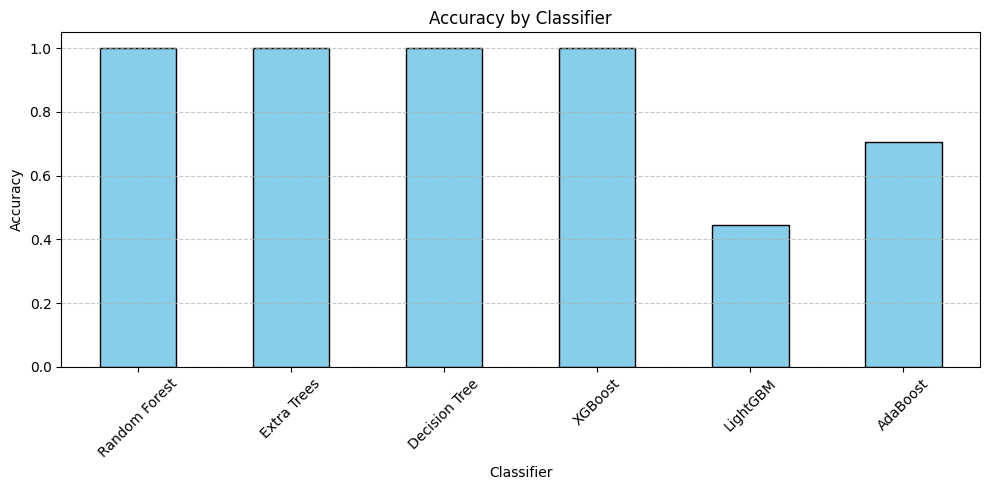

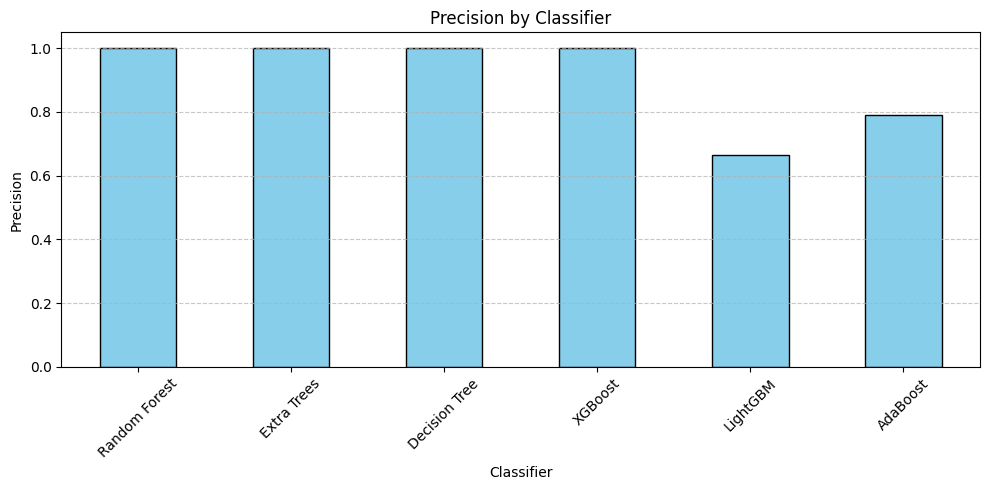

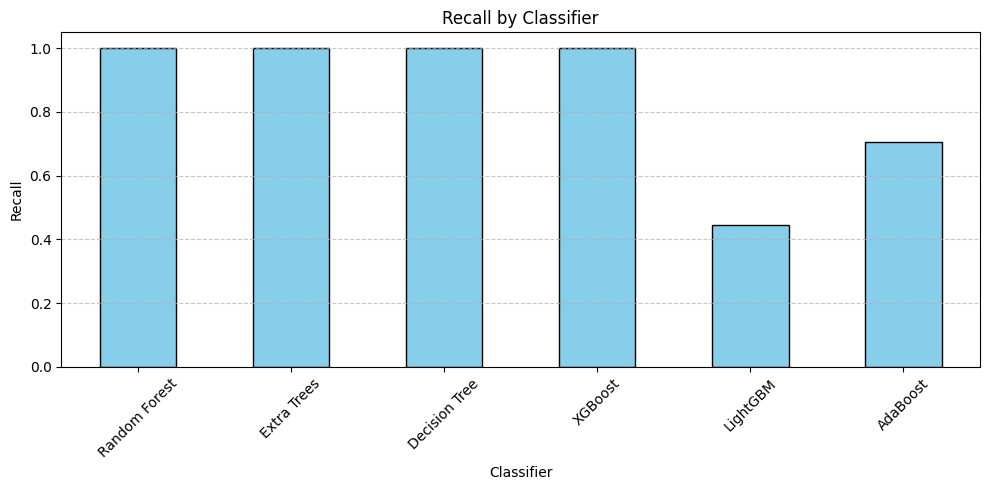

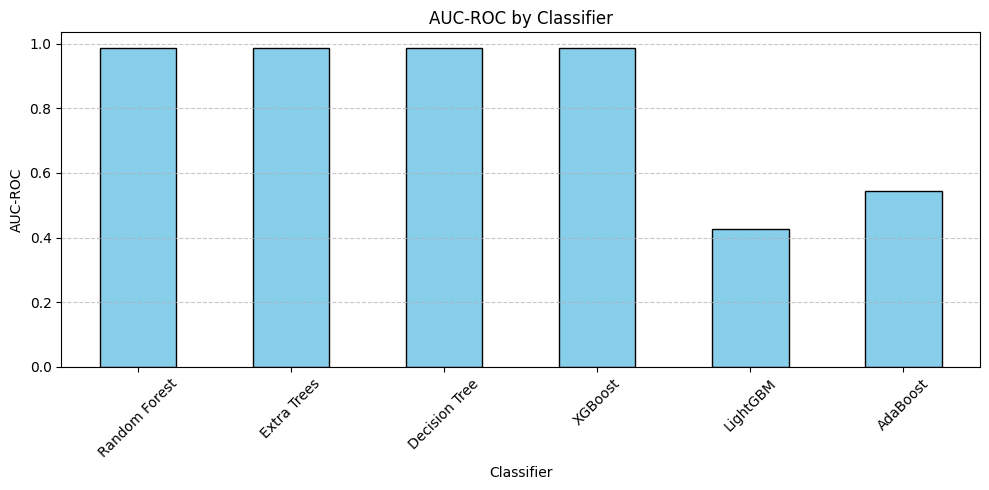

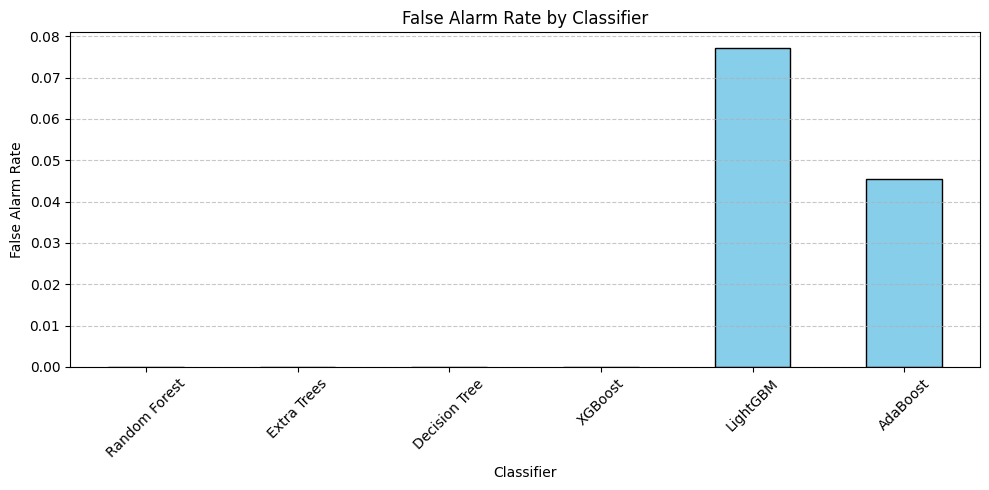

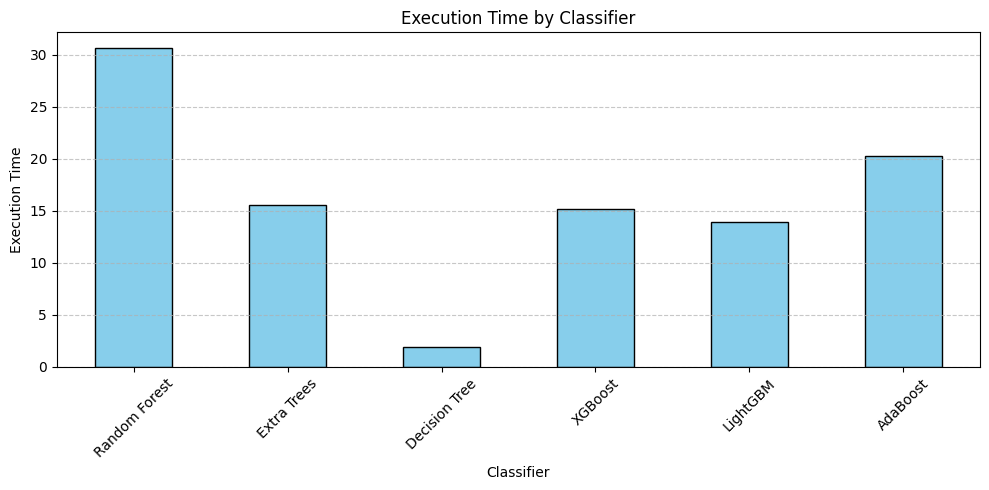

In [47]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
import time

# Step 1: Function for False Alarm Rate Calculation
def calculate_false_alarm_rate(cm):
    """
    Calculate the False Alarm Rate (FAR) for binary or multi-class classification.
    For binary classification, FAR = FP / (FP + TN).
    For multi-class, FAR is the average false alarm across all classes.
    """
    if cm.shape == (2, 2):  # Binary classification
        tn, fp, fn, tp = cm.ravel()
        return fp / (fp + tn)
    else:  # Multi-class classification
        false_positives = cm.sum(axis=0) - np.diag(cm)
        true_negatives = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1)) + np.diag(cm)
        return np.mean(false_positives / (false_positives + true_negatives))

# Step 2: Train and Evaluate Classifiers
def train_and_evaluate(X, y, features):
    # Use only selected features
    X = X[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define classifiers
    classifiers = {
        'Random Forest': RandomForestClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'LightGBM': LGBMClassifier(),
        'AdaBoost': AdaBoostClassifier()
    }

    results = []

    for name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        end_time = time.time()

        # Evaluation Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr')

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

        # Compute False Alarm Rate
        false_alarm_rate = calculate_false_alarm_rate(cm)

        execution_time = end_time - start_time

        results.append({
            'Classifier': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'AUC-ROC': auc_roc,
            'False Alarm Rate': false_alarm_rate,
            'Execution Time': execution_time
        })

    return pd.DataFrame(results)

# Example: Assuming X, y, and final_features are defined
results = train_and_evaluate(X, y, final_features)
print("Results:")
print(results)

# Optional: Visualize Results
import matplotlib.pyplot as plt

def plot_results(results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'False Alarm Rate', 'Execution Time']
    results.set_index('Classifier', inplace=True)

    for metric in metrics:
        plt.figure(figsize=(10, 5))
        results[metric].plot(kind='bar', title=f'{metric} by Classifier', color='skyblue', edgecolor='black')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Plot metrics
plot_results(results)
